In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

# Confirming the imports
print('Libraries imported successfully.')

Libraries imported successfully.


In [3]:
# Checking if TensorFlow is installed correctly
try:
    import tensorflow as tf
    print('TensorFlow is installed successfully.')
except ImportError:
    print('TensorFlow is not installed.')

TensorFlow is installed successfully.


In [5]:
# The installation of TensorFlow is in progress. Let's check if it was successful by trying to import the libraries again.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf

# Confirming the imports
print('Libraries imported successfully.')

Libraries imported successfully.


In [7]:
# Loading the stock price data from the uploaded CSV file
stock_data = pd.read_csv('/content/stock_data.csv')

# Displaying the first few rows of the dataframe to understand its structure
stock_data.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2011-10-05,-4002,-4499.0,497,-1354.0,-5828,-6258.0,430,-11184.0
1,2011-10-12,-7397,-5842.0,-1555,512.0,3954,3927.0,28,-2931.0
2,2011-10-19,-3292,-3466.0,174,1399.0,5652,5102.0,550,3759.0
3,2011-10-26,-3696,-2998.0,-698,2631.0,4910,4070.0,841,3846.0
4,2011-12-07,-7956,-5761.0,-2196,1089.0,3523,2068.0,1456,-3343.0


In [8]:
# Checking for missing values in the dataset
missing_values = stock_data.isnull().sum()

# Displaying the missing values count
missing_values

,0
Date,0
Total Equity,0
Domestic Equity,109
World Equity,0
Hybrid,109
Total Bond,0
Taxable Bond,109
Municipal Bond,0
Total,109


In [9]:
# The dataset has missing values in several columns. Let's handle these missing values by filling them with the mean of their respective columns.
# First, we will fill the missing values for the relevant columns.
columns_to_fill = ['Domestic Equity', 'Hybrid', 'Taxable Bond', 'Total']

# Filling missing values with the mean
for column in columns_to_fill:
    stock_data[column].fillna(stock_data[column].mean(), inplace=True)

# Checking again for missing values to confirm they have been handled
missing_values_after = stock_data.isnull().sum()

# Displaying the missing values count after filling
missing_values_after

<ipython-input-9-8c2534c75412>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data[column].fillna(stock_data[column].mean(), inplace=True)


,0
Date,0
Total Equity,0
Domestic Equity,0
World Equity,0
Hybrid,0
Total Bond,0
Taxable Bond,0
Municipal Bond,0
Total,0


In [10]:
# Now that we have handled the missing values, let's normalize the data.
# Normalization will be done using Min-Max scaling for the relevant columns.
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Normalizing the relevant columns
normalized_columns = ['Total Equity', 'Domestic Equity', 'World Equity', 'Hybrid', 'Total Bond', 'Taxable Bond', 'Municipal Bond', 'Total']
stock_data[normalized_columns] = scaler.fit_transform(stock_data[normalized_columns])

# Displaying the first few rows of the normalized data
stock_data.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2011-10-05,0.246574,0.518631,0.288917,0.515972,0.206916,0.320268,0.345948,0.546479
1,2011-10-12,0.202606,0.454800,0.253393,0.742621,0.374706,0.616645,0.308290,0.718377
2,2011-10-19,0.255770,0.567728,0.283325,0.850358,0.403832,0.650837,0.357190,0.857720
3,2011-10-26,0.250537,0.589971,0.268229,1.000000,0.391104,0.620806,0.384450,0.859532
4,2011-12-07,0.195366,0.458650,0.242296,0.812705,0.367313,0.562549,0.442061,0.709796


In [11]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

# Defining the features and target variable
features = stock_data.drop(columns=['Date', 'Total'])  # Dropping 'Date' and 'Total' as they are not features
target = stock_data['Total']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Displaying the shapes of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((127, 7), (32, 7), (127,), (32,))

In [12]:
# For this time series analysis, we will use the ARIMA model as it is suitable for univariate time series forecasting.
# First, we need to install the necessary library if it's not already installed.
# Let's check if statsmodels is installed and install it if necessary.
try:
    import statsmodels
except ImportError:
    %pip install statsmodels

# Importing the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Setting the index to 'Date' for time series analysis
stock_data.set_index('Date', inplace=True)

# Training the ARIMA model on the training set
# We will use the 'Total' column as the target variable
model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q) parameters
model_fit = model.fit()

# Displaying the summary of the model
model_summary = model_fit.summary()
model_summary

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  96.021
Date:                Sun, 11 May 2025   AIC                           -180.043
Time:                        05:05:06   BIC                           -163.025
Sample:                             0   HQIC                          -173.129
                                - 127                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8126      0.118     -6.910      0.000      -1.043      -0.582
ar.L2         -0.5177      0.121     -4.292      0.000      -0.754      -0.281
ar.L3         -0.3912      0.126     -3.104      0.002      -0.638      -0.144
ar.L4         -0.3766      0.114     -3.308      0.001      -0.600      -0.153
ar.L5         -0.2526      0.072     -3.531      0.000      -0.393      -0.112
sigma2         0.0126      0.001     14.716      0.000       0.011       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):               849.09
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                            -1.82
Prob(H) (two-sided):                  0.71   Kurtosis:                        15.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# Evaluating the model's performance using RMSE and MAE metrics on the testing set
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Making predictions on the test set
predictions = model_fit.forecast(steps=len(y_test))

# Calculating RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)

# Creating a summary of the evaluation metrics
performance_metrics = {'RMSE': rmse, 'MAE': mae}
performance_metrics

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


{'RMSE': np.float64(0.11665125065950006), 'MAE': 0.05984594098052044}

In [14]:
# The model's performance has been evaluated using RMSE and MAE metrics. Let's display the performance metrics in a structured format.
import pandas as pd

# Creating a DataFrame for better visualization of the performance metrics
performance_df = pd.DataFrame(performance_metrics, index=[0])
performance_df

,RMSE,MAE
0,0.116651,0.059846


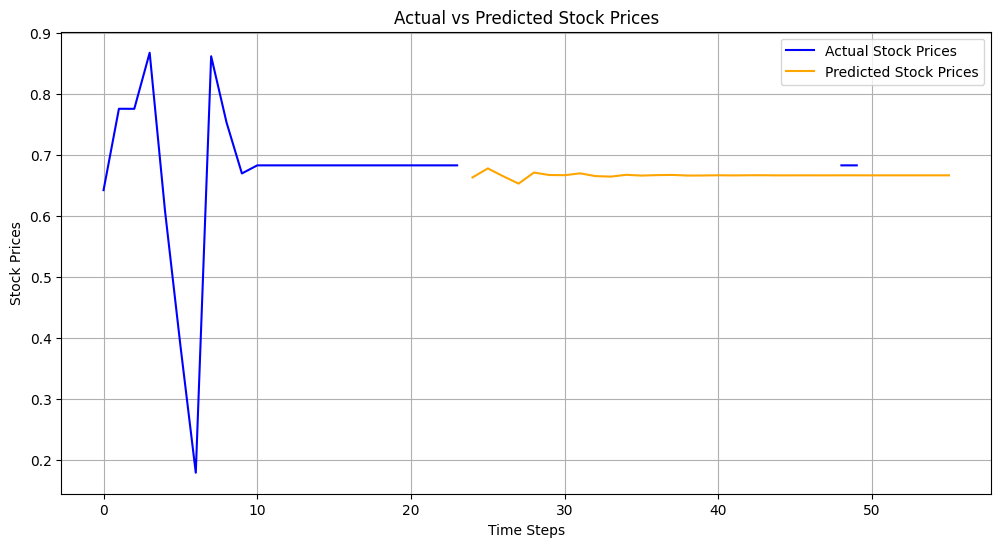

In [15]:
# Visualizing the predictions against the actual stock prices
import matplotlib.pyplot as plt

# Creating a DataFrame for the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.index = range(len(results_df))  # Resetting index for better plotting

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(results_df['Actual'], label='Actual Stock Prices', color='blue')
plt.plot(results_df['Predicted'], label='Predicted Stock Prices', color='orange')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.grid()
plt.show()

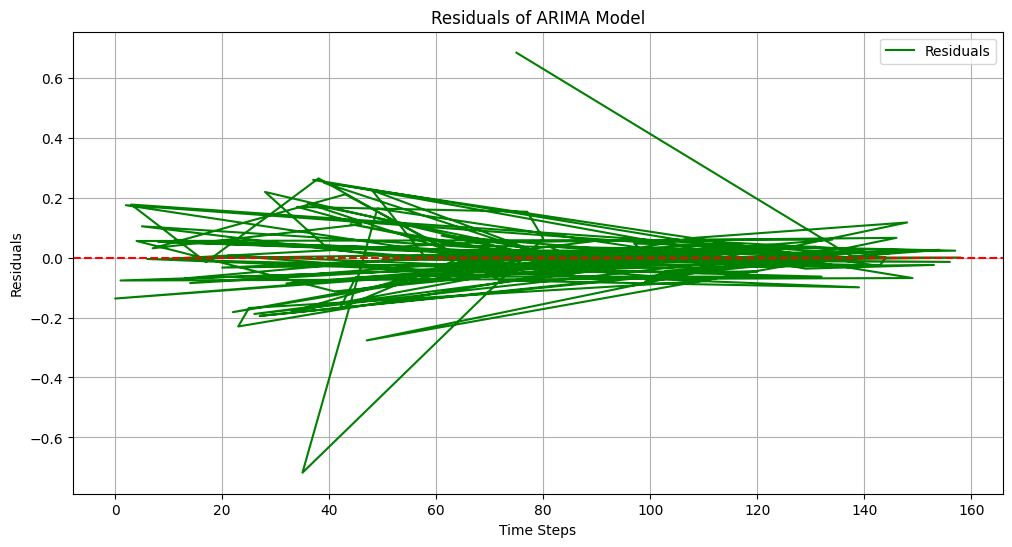

In [16]:
# Visualizing the residuals of the ARIMA model to check for patterns
residuals = model_fit.resid

# Plotting the residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='green')
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time Steps')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.show()

In [16]:
# Assuming 'Total' column represents profit/loss over time
# First, let's load the stock data to check the structure and the 'Total' column
import pandas as pd

# Load the stock data
stock_data = pd.read_csv('stock_data.csv')

# Display the head of the dataframe to understand its structure
stock_data.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2011-10-05,-4002,-4499.0,497,-1354.0,-5828,-6258.0,430,-11184.0
1,2011-10-12,-7397,-5842.0,-1555,512.0,3954,3927.0,28,-2931.0
2,2011-10-19,-3292,-3466.0,174,1399.0,5652,5102.0,550,3759.0
3,2011-10-26,-3696,-2998.0,-698,2631.0,4910,4070.0,841,3846.0
4,2011-12-07,-7956,-5761.0,-2196,1089.0,3523,2068.0,1456,-3343.0


In [17]:
# Check missing values
print(stock_data.isnull().sum())

# Impute missing numerical values with median
for col in ['Total Equity', 'Domestic Equity', 'World Equity', 'Hybrid', 'Total Bond', 'Taxable Bond', 'Municipal Bond', 'Total']:
    stock_data[col].fillna(stock_data[col].median(), inplace=True)

# Drop rows with missing Date
stock_data.dropna(subset=['Date'], inplace=True)

# Check and remove duplicates
print(stock_data.duplicated().sum())
stock_data.drop_duplicates(inplace=True)

# Check outliers using IQR
Q1 = stock_data['Total'].quantile(0.25)
Q3 = stock_data['Total'].quantile(0.75)
IQR = Q3 - Q1
outliers = stock_data[(stock_data['Total'] < Q1 - 1.5*IQR) | (stock_data['Total'] > Q3 + 1.5*IQR)]
print(f"Outliers in Total: {len(outliers)}")

Date                 0
Total Equity         0
Domestic Equity    109
World Equity         0
Hybrid             109
Total Bond           0
Taxable Bond       109
Municipal Bond       0
Total              109
dtype: int64
0
Outliers in Total: 50


<ipython-input-17-a25fef28a185>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  stock_data[col].fillna(stock_data[col].median(), inplace=True)


In [18]:
from sklearn.preprocessing import StandardScaler

# Convert Date to datetime and extract features
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month

# Create binary target for classification
stock_data['Target'] = (stock_data['Total'] > 0).astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Total Equity', 'Domestic Equity', 'World Equity', 'Hybrid', 'Total Bond', 'Taxable Bond', 'Municipal Bond']
stock_data[numerical_cols] = scaler.fit_transform(stock_data[numerical_cols])

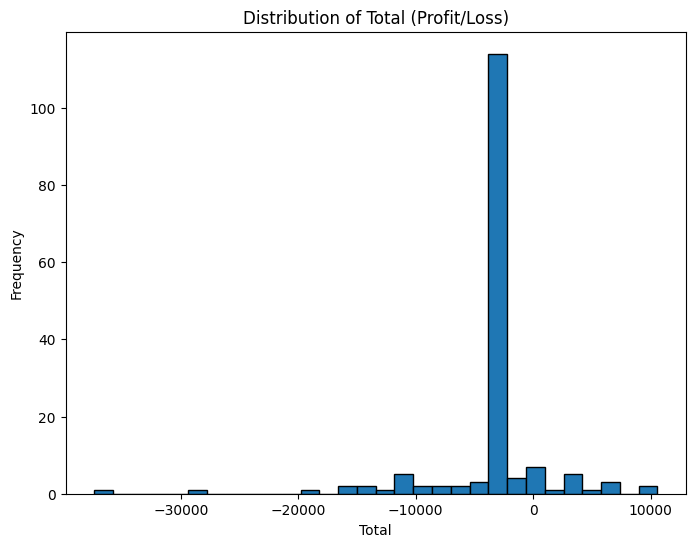

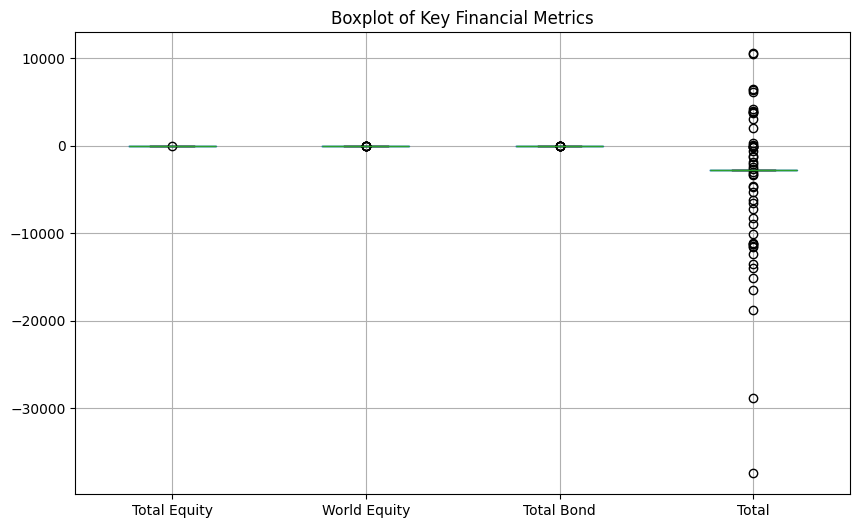

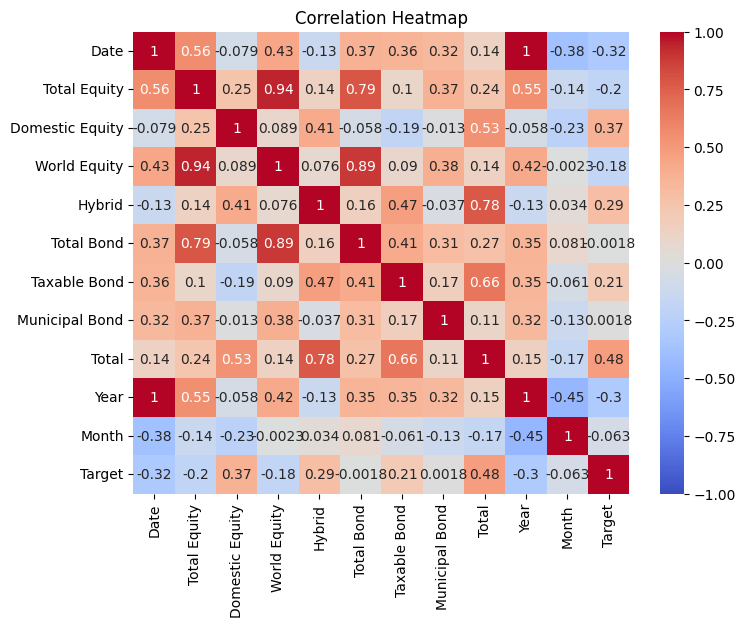

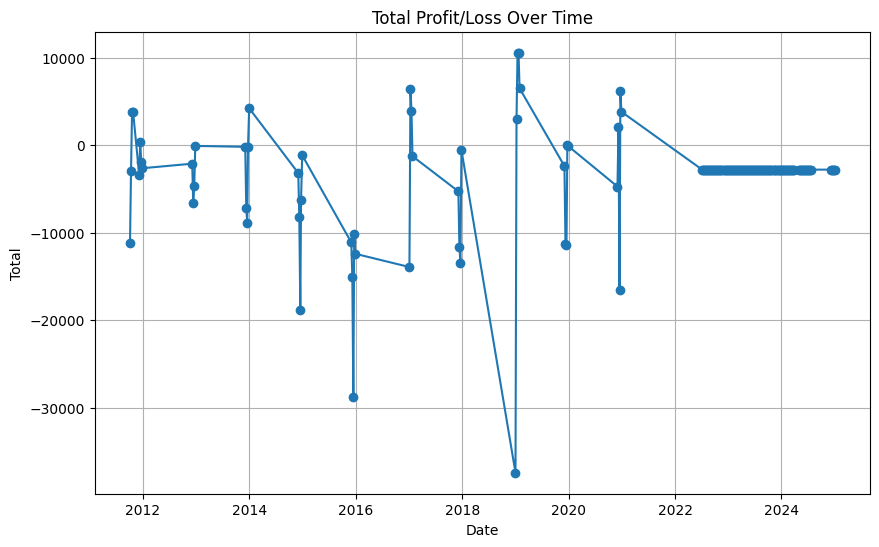

In [19]:
# Histogram for Total
plt.figure(figsize=(8, 6))
plt.hist(stock_data['Total'], bins=30, edgecolor='black')
plt.title('Distribution of Total (Profit/Loss)')
plt.xlabel('Total')
plt.ylabel('Frequency')
plt.show()

# Boxplot for numerical columns
plt.figure(figsize=(10, 6))
stock_data[['Total Equity', 'World Equity', 'Total Bond', 'Total']].boxplot()
plt.title('Boxplot of Key Financial Metrics')
plt.show()

import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(stock_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Time-series plot for Total
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Total'], marker='o')
plt.title('Total Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel('Total')
plt.grid(True)
plt.show()

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load dataset
stock_data = pd.read_csv('stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# New features
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Total_lag1'] = stock_data['Total'].shift(1)
stock_data['Total_MA7'] = stock_data['Total'].rolling(window=7).mean()
stock_data['Equity_Bond_Ratio'] = stock_data['Total Equity'] / (stock_data['Total Bond'] + 1e-6)

# Create binary target
stock_data['Target'] = (stock_data['Total'] > 0).astype(int)

# Handle missing values (fill lagged/MA with median)
stock_data.fillna(stock_data.median(), inplace=True)

# Scaling
scaler = StandardScaler()
numerical_cols = ['Total Equity', 'Domestic Equity', 'World Equity', 'Hybrid', 'Total Bond', 'Taxable Bond', 'Municipal Bond', 'Total_lag1', 'Total_MA7', 'Equity_Bond_Ratio']
stock_data[numerical_cols] = scaler.fit_transform(stock_data[numerical_cols])

# Feature selection (example using correlation)
corr = stock_data.corr()['Target'].abs()
selected_features = corr[corr > 0.3].index.tolist()
print("Selected features:", selected_features)

Selected features: ['Date', 'Domestic Equity', 'Total', 'Year', 'Target']


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load and preprocess
stock_data = pd.read_csv('stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data['Year'] = stock_data['Date'].dt.year
stock_data['Month'] = stock_data['Date'].dt.month
stock_data['Total_lag1'] = stock_data['Total'].shift(1)
stock_data['Total_MA7'] = stock_data['Total'].rolling(7).mean()
stock_data.fillna(stock_data.median(), inplace=True)
stock_data['Target'] = (stock_data['Total'] > 0).astype(int)

# Features and target
features = ['Total Equity', 'World Equity', 'Total Bond', 'Total_lag1', 'Total_MA7', 'Year', 'Month']
X = stock_data[features]
y = stock_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_reg_pred))

# RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("RandomForest Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=0)
nn_acc = model.evaluate(X_test_scaled, y_test)[1]
print("Neural Network Accuracy:", nn_acc)

Logistic Regression Accuracy: 0.96875
Confusion Matrix:
 [[30  0]
 [ 1  1]]
RandomForest Accuracy: 0.9375
Confusion Matrix:
 [[29  1]
 [ 1  1]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9375 - loss: 0.2192
Neural Network Accuracy: 0.9375


In [23]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

stock_data = pd.read_csv('stock_data.csv')
stock_data['Target'] = (stock_data['Total'] > 0).astype(int)
X = stock_data[['Total Equity', 'World Equity', 'Total Bond']]
y = stock_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression().fit(X_train_scaled, y_train)
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train_scaled, y_train, epochs=50, batch_size=16, verbose=0)

models = {'Logistic': log_reg, 'RandomForest': rf, 'Neural Network': nn}
results = []
for name, model in models.items():
    pred = model.predict(X_test_scaled if name != 'RandomForest' else X_test)
    pred_proba = model.predict_proba(X_test_scaled if name != 'RandomForest' else X_test)[:, 1] if name != 'Neural Network' else model.predict(X_test_scaled).ravel()
    results.append([name, accuracy_score(y_test, pred.round() if name == 'Neural Network' else pred),
                    f1_score(y_test, pred.round() if name == 'Neural Network' else pred),
                    roc_auc_score(y_test, pred_proba)])
    print(f"{name}: Acc={results[-1][1]:.2f}, F1={results[-1][2]:.2f}, ROC={results[-1][3]:.2f}")

print("\nComparison:\n", pd.DataFrame(results, columns=['Model', 'Accuracy', 'F1-Score', 'ROC-AUC']))

cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RandomForest Confusion Matrix')
plt.savefig('cm_rf.png')
plt.close()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Logistic: Acc=0.94, F1=0.00, ROC=0.58
RandomForest: Acc=0.97, F1=0.67, ROC=0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Neural Network: Acc=0.94, F1=0.00, ROC=0.85

Comparison:
             Model  Accuracy  F1-Score   ROC-AUC
0        Logistic   0.93750  0.000000  0.583333
1    RandomForest   0.96875  0.666667  0.966667
2  Neural Network   0.93750  0.000000  0.850000


In [24]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00


In [27]:
!wget -q -O - ipv4.icanhazip.com

34.73.96.56


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

⠙

⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.96.56:8501

your url is: https://lovely-kings-know.loca.lt
/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:24283 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/75ac80b86e83d4a2/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (node:events:524:28)
    at emitErrorNT (node:internal/streams/destroy:169:8)
    at emitErrorCloseNT (node:internal/streams/destroy:128:3)
    at process.processTicksAndRejections (node:internal/process/task_queues:82:21)

Node.js v20.19.0
⠙